# Overview

- After the organization and splitting of the dataset into training, validation, and testing subsets
- Data augmentation techniques were applied to the training set to enhance model generalization.

The next step involves creating data loaders and training both CNN-based and Transformer-based models.

**This Notebook is for training CNN-based models**

# Importing Library

In [3]:
from helper_function import Create_dataloader
import torch
import torch.nn as nn
import torchvision
from helper_function import train
from torch.optim.lr_scheduler import ExponentialLR
from helper_function import Model_evaluate, loss_and_acc_plots,plot_roc_auc
from helper_function import plot_roc_auc
from timm import create_model
import torch
import gc


/home/aa23798/.conda/envs/FinalProject/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data loader

In [4]:
train_dataloader,valid_dataloader,test_dataloader= Create_dataloader(train_dir="/home/aa23798/Project/Final_dataset/images/Aug"
                                                                     ,valid_dir="/home/aa23798/Project/Final_dataset/images/Valid"
                                                                     ,test_dir="/home/aa23798/Project/Final_dataset/images/Test"
                                                                     ,batch_size=32)


helper function file was used which involves munch essential function for creating dataloader, training and evaluation 

# Models

## ResNet 101

In [2]:
class ResNet(torch.nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.resnet = torchvision.models.resnet101(pretrained=True)
        
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.resnet(x)

In [4]:
ResNet_Model = ResNet(num_classes=3)
device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=ResNet_Model.parameters(),
                             lr=1e-3)

scheduler = ExponentialLR(optimizer, gamma=0.9)

ResNet_Model = ResNet_Model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

ResNet_Model_results = train(model=ResNet_Model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,
                            scheduler=scheduler)



/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1, Training Loss: 0.5816, Training Accuracy: 0.7577, Training Precision: 0.7709, Training Recall: 0.7550, Training F1: 0.7605, Test Loss: 0.3808, Test Accuracy: 0.8087, Test Precision: 0.7768, Test Recall: 0.7584, Test F1: 0.7652, Test Sensitivity: 0.7584

Epoch 2, Training Loss: 0.3996, Training Accuracy: 0.8443, Training Precision: 0.8506, Training Recall: 0.8424, Training F1: 0.8456, Test Loss: 1.4567, Test Accuracy: 0.4920, Test Precision: 0.6815, Test Recall: 0.5970, Test F1: 0.4927, Test Sensitivity: 0.5970

Epoch 3, Training Loss: 0.2972, Training Accuracy: 0.8912, Training Precision: 0.8944, Training Recall: 0.8894, Training F1: 0.8915, Test Loss: 0.3371, Test Accuracy: 0.8841, Test Precision: 0.8712, Test Recall: 0.9021, Test F1: 0.8747, Test Sensitivity: 0.9021

Epoch 4, Training Loss: 0.2412, Training Accuracy: 0.9185, Training Precision: 0.9196, Training Recall: 0.9180, Training F1: 0.9187, Test Loss: 0.2463, Test Accuracy: 0.9036, Test Precision: 0.8868, Test Recall

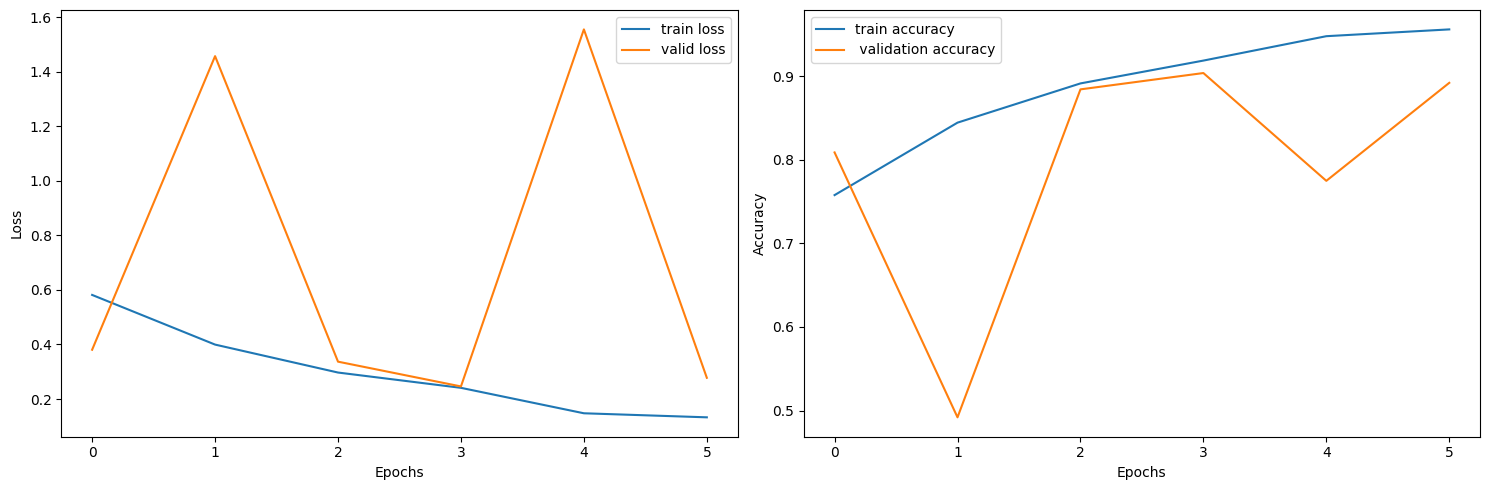

In [9]:
loss_and_acc_plots(ResNet_Model_results,True)

In [7]:
ResNet_Model.load_state_dict(torch.load('/home/aa23798/Project/Best Models/Resnet101/best_model.pth'))

<All keys matched successfully>

Test Accuracy: 0.9637
Test Precision: 0.9638
Test Recall: 0.9645
Test F1 Score: 0.9641
Test Sensitivity: 0.9645


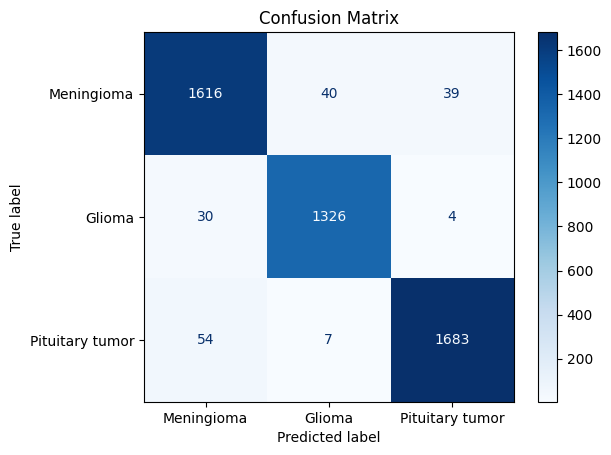

In [8]:
Model_evaluate(ResNet_Model, train_dataloader)

Test Accuracy: 0.9036
Test Precision: 0.8868
Test Recall: 0.9057
Test F1 Score: 0.8922
Test Sensitivity: 0.9057


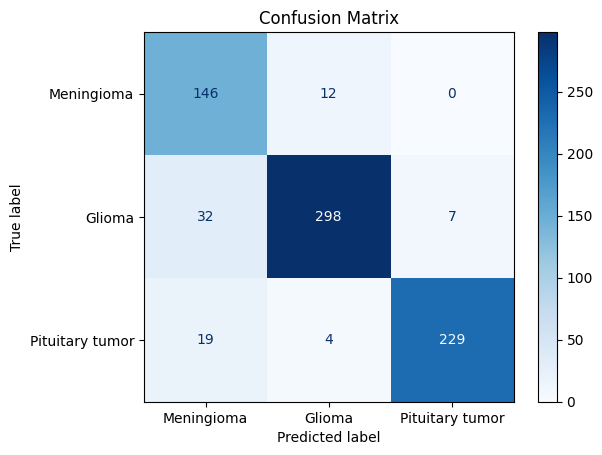

In [9]:
Model_evaluate(ResNet_Model, valid_dataloader)

Test Accuracy: 0.8830
Test Precision: 0.8718
Test Recall: 0.8699
Test F1 Score: 0.8708
Test Sensitivity: 0.8699


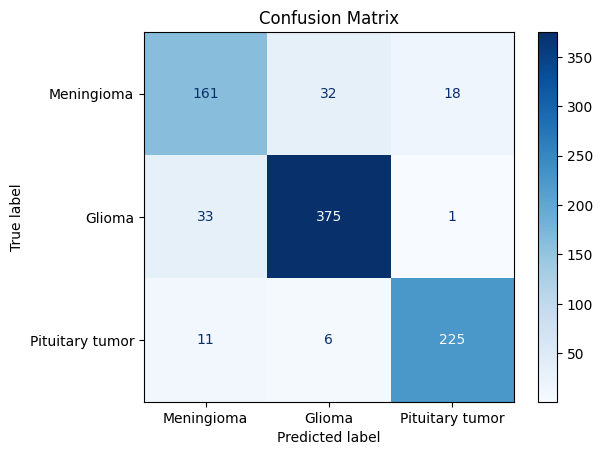

In [10]:
Model_evaluate(ResNet_Model, test_dataloader)

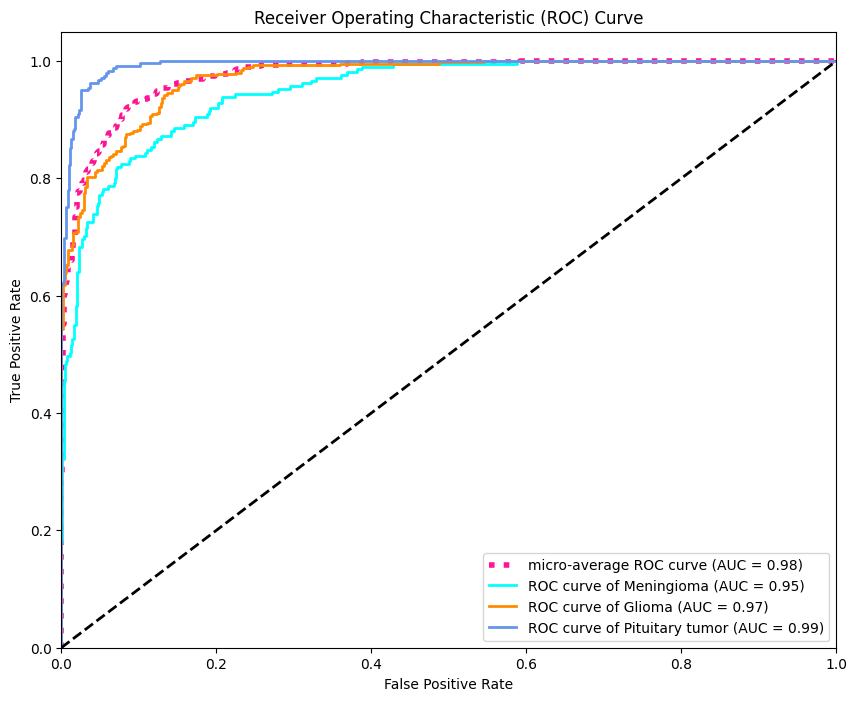

AUC Scores:
Meningioma: 0.9502
Glioma: 0.9712
Pituitary tumor: 0.9934
Micro-average: 0.9757


In [11]:
plot_roc_auc(ResNet_Model, test_dataloader,device)

## DenseNet121

In [3]:
class DenseNet(torch.nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.densenet = torchvision.models.densenet121(pretrained=True)
        
        self.densenet.classifier = nn.Sequential(
            nn.Linear(self.densenet.classifier.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.densenet(x)
    
DenseNet_Model = DenseNet(num_classes=3)

device = "cuda" if torch.cuda.is_available() else "cpu"

optimizer = torch.optim.Adam(params=DenseNet_Model.parameters(),
                             lr=1e-3,weight_decay=1e-4)

scheduler = ExponentialLR(optimizer, gamma=0.9)

DenseNet_Model = DenseNet_Model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

DenseNet_Model_results = train(model=DenseNet_Model,
                           train_loader=train_dataloader,
                           test_loader=valid_dataloader,
                           epochs=50,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device,
                            scheduler=scheduler)

/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/50 [00:00<?, ?it/s]


Epoch 1, Training Loss: 1.6850, Training Accuracy: 0.8354, Training Precision: 0.8388, Training Recall: 0.8351, Training F1: 0.8366, Test Loss: 1.9099, Test Accuracy: 0.6328, Test Precision: 0.6491, Test Recall: 0.5897, Test F1: 0.5648, Test Sensitivity: 0.5897

Epoch 2, Training Loss: 1.2633, Training Accuracy: 0.9148, Training Precision: 0.9158, Training Recall: 0.9140, Training F1: 0.9148, Test Loss: 0.2982, Test Accuracy: 0.8932, Test Precision: 0.8792, Test Recall: 0.9102, Test F1: 0.8841, Test Sensitivity: 0.9102

Epoch 3, Training Loss: 1.0078, Training Accuracy: 0.9346, Training Precision: 0.9355, Training Recall: 0.9348, Training F1: 0.9351, Test Loss: 0.3212, Test Accuracy: 0.8958, Test Precision: 0.8830, Test Recall: 0.9059, Test F1: 0.8849, Test Sensitivity: 0.9059

Epoch 4, Training Loss: 0.8581, Training Accuracy: 0.9496, Training Precision: 0.9503, Training Recall: 0.9499, Training F1: 0.9501, Test Loss: 0.1631, Test Accuracy: 0.9375, Test Precision: 0.9294, Test Recall

In [13]:
DenseNet_Model.load_state_dict(torch.load('/home/aa23798/Project/Best Models/Densenet121/best_model.pth'))

<All keys matched successfully>

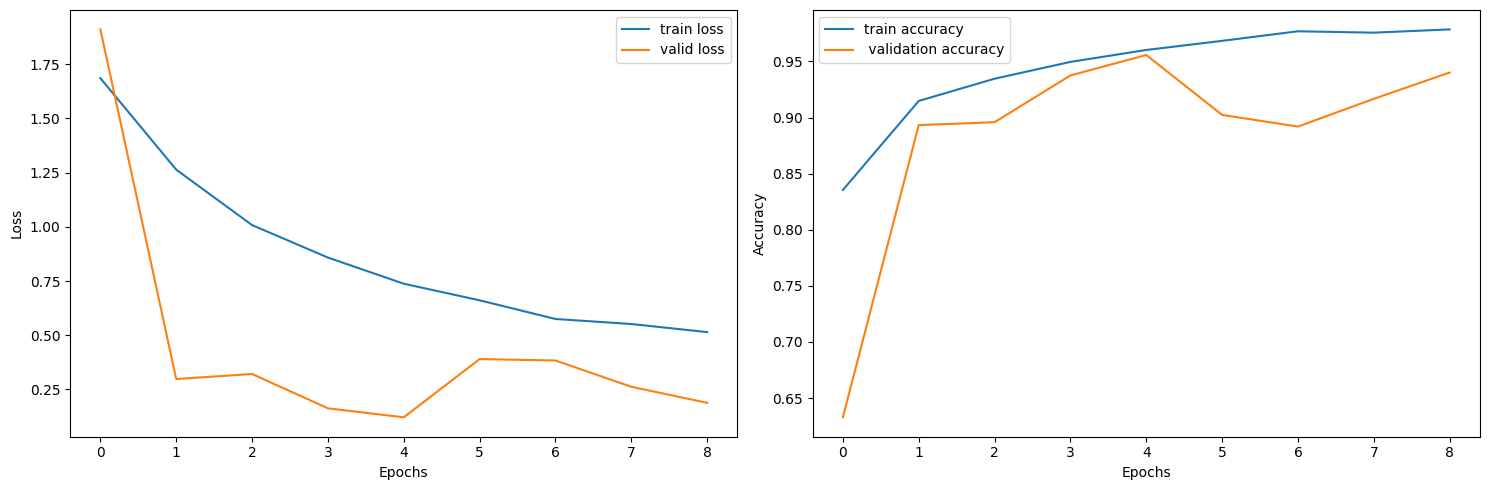

In [5]:
loss_and_acc_plots(DenseNet_Model_results,True)

Test Accuracy: 0.9704
Test Precision: 0.9688
Test Recall: 0.9721
Test F1 Score: 0.9696
Test Sensitivity: 0.9721


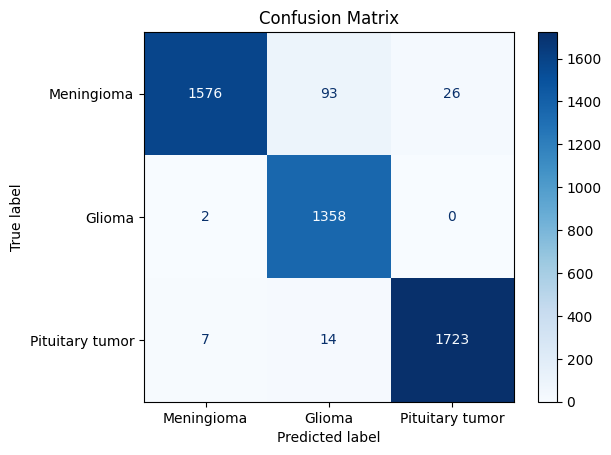

In [14]:
Model_evaluate(DenseNet_Model,train_dataloader)

Test Accuracy: 0.9557
Test Precision: 0.9610
Test Recall: 0.9404
Test F1 Score: 0.9493
Test Sensitivity: 0.9404


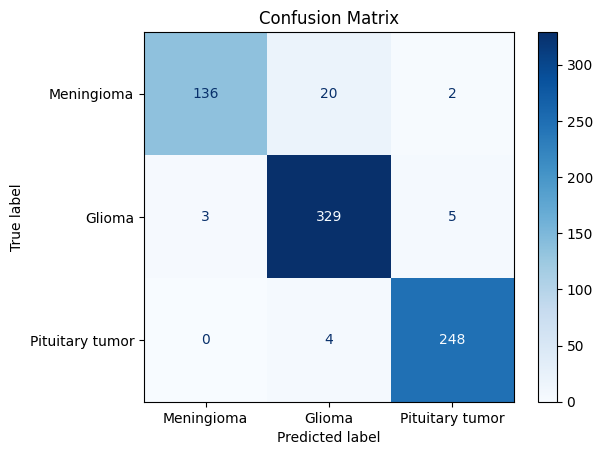

In [15]:
Model_evaluate(DenseNet_Model,valid_dataloader)

Test Accuracy: 0.9306
Test Precision: 0.9375
Test Recall: 0.9129
Test F1 Score: 0.9210
Test Sensitivity: 0.9129


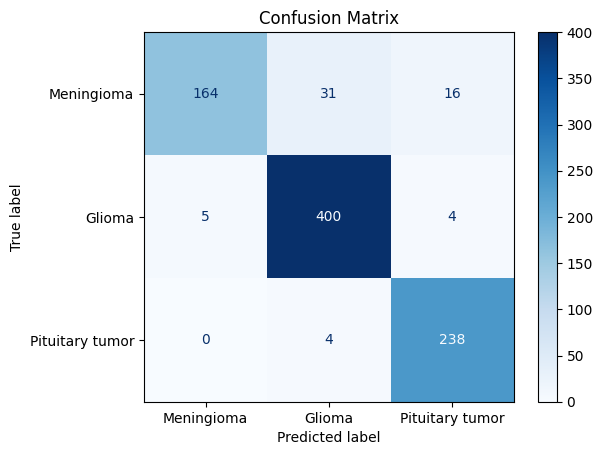

In [16]:
Model_evaluate(DenseNet_Model,test_dataloader)

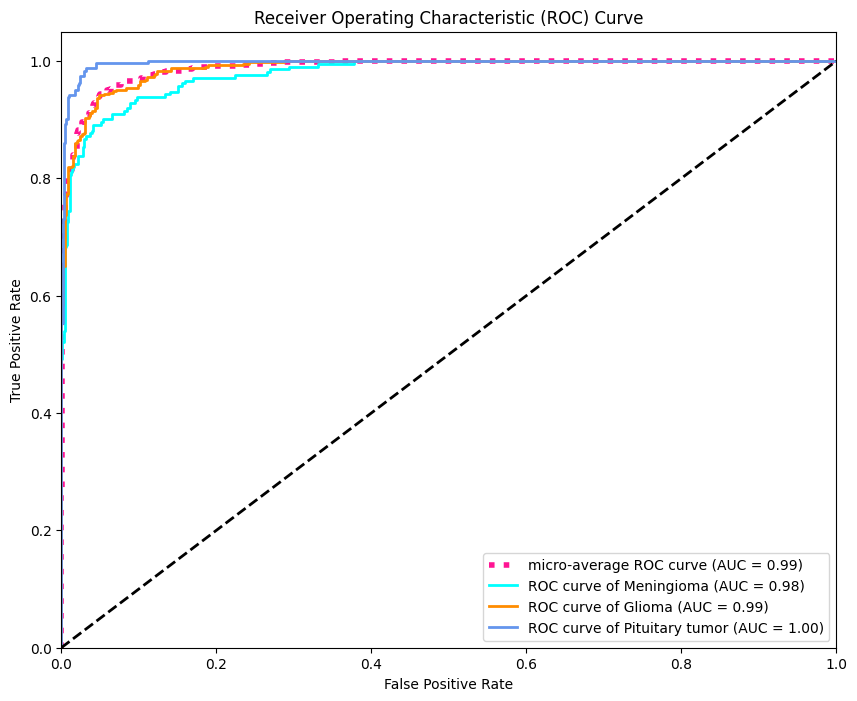

AUC Scores:
Meningioma: 0.9787
Glioma: 0.9877
Pituitary tumor: 0.9968
Micro-average: 0.9882


In [17]:
plot_roc_auc(DenseNet_Model,test_dataloader,device)

# Results

**Table 1: Training Results**

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Models} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{Resnet101} & 96.37\% & 96.38\% & 96.45\% & 96.41\% & 96.45\%\\
\hline
\textbf{Densenet121} & 97.04\% & 96.88\% & 97.21\% & 96.96\% & 97.21\% \\
\hline
\end{array}
$$


**Table 2: Validataion Results**

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Models} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{Resnet101} & 90.36\% & 88.68\% & 90.57\% & 89.22\% & 90.57\% \\
\hline
\textbf{Densenet121} & 95.57\% & 96.10\% & 94.04\% & 94.93\% & 94.04\% \\
\hline
\end{array}
$$


**Table 3: Testing Results**

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Models} & \text{Accuracy} & \text{Precision} & \text{Recall} & \text{F1-score} & \text{Sensitivity} \\
\hline
\text{Resnet101} & 88.30\% & 87.18\% & 86.99\% & 87.08\% & 86.99\%\\
\hline
\textbf{Densenet121} & 93.06\% & 93.75\% & 91.29\% & 92.10\% & 91.29\% \\
\hline
\end{array}
$$


**Table 4: AUC Curve Results**

$$
\begin{array}{|c|c|c|c|}
\hline
\text{Model} & \text{AUC (Meningioma)} & \text{AUC (Glioma)} & \text{AUC (Pituitary)} \\
\hline
\text{Resnet101} & \text{0.9502} & \text{0.9712} & \text{0.9934} \\
\hline
\textbf{Densenet121} & \text{0.9787} & \text{0.9877} & \text{0.9968} \\
\hline
\end{array}
$$
